# 2021/10/6
# 本代码旨在绘制famil实验及merra2之间的、在孟加拉湾区域的副高强度之差
# 先前已经绘制了从低层到高层的位势高度之差，famil结果普遍较观测偏低，因此这里试试使用纬向偏差的绝对值再作差
# 来表示副高的强度

In [2]:
import xarray as xr
import os
import numpy as np

#处理famil实验的结果
path1      =  '/home/sun/qomo-data/zhuang_plev/'
lat_slice  =  slice(5,15)
time_slice =  slice(90,150)
f1         =  xr.open_dataset(path1+'plev_con_T.nc').sel(time=time_slice,lat=lat_slice)
h1         =  np.zeros((2,27,384))
#计算4月的经向、时间平均
h1[0,:]    =  np.average(np.average(f1.Z3.data[0:30],axis=0),axis=1)
h1[1,:]    =  np.average(np.average(f1.Z3.data[30:60],axis=0),axis=1)

path2      =  '/home/sun/qomo-data/year_mean/multi/'
file2_list =  os.listdir(path2) ; file2_list.sort()
test2      =  xr.open_dataset(path2+file2_list[1]).sel(lat=lat_slice)
h2         =  np.zeros((2,42,576))
for i in range(90,120):
    f2     =  xr.open_dataset(path2+file2_list[i]).sel(lat=lat_slice)
    h2[0,:]  +=  np.average(f2.H.data[0,:],axis=1)/30
    f2     =  xr.open_dataset(path2+file2_list[i+30]).sel(lat=lat_slice)
    h2[1,:]  +=  np.average(f2.H.data[0,:],axis=1)/30


#计算每一高度层的纬向平均以及纬向偏差
dev1  =  np.zeros((2,27))
dev2  =  np.zeros((2,42))

for i in range(0,27):
    dev1[0,i]  =  np.average(h1[0,i,96:107],axis=0) - np.average(h1[0,i,:],axis=0)
    dev1[1,i]  =  np.average(h1[1,i,96:107],axis=0) - np.average(h1[1,i,:],axis=0)

for i in range(0,42):
    dev2[0,i]  =  np.average(h2[0,i,449:454],axis=0) - np.average(h2[0,i,:],axis=0)
    dev2[1,i]  =  np.average(h2[1,i,449:454],axis=0) - np.average(h2[1,i,:],axis=0)

#插值到统一坐标系



In [3]:
pnew  =  np.linspace(1000,200,33)

dev1_in       =  np.zeros((2,len(pnew))) ; dev2_in  =  dev1_in.copy()
dev1_in[0,:]  =  np.interp(pnew[::-1],f1.lev.data[::-1],dev1[0,::-1]) ; dev1_in[0,:]  =  dev1_in[0,::-1]
dev1_in[1,:]  =  np.interp(pnew[::-1],f1.lev.data[::-1],dev1[1,::-1]) ; dev1_in[1,:]  =  dev1_in[1,::-1]
dev2_in[0,:]  =  np.interp(pnew[::-1],f2.lev.data[::-1],dev2[0,::-1]) ; dev2_in[0,:]  =  dev2_in[0,::-1]
dev2_in[1,:]  =  np.interp(pnew[::-1],f2.lev.data[::-1],dev2[1,::-1]) ; dev2_in[1,:]  =  dev2_in[1,::-1]

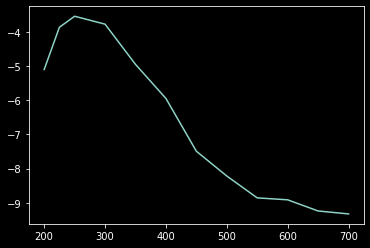

In [9]:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots()  # Create a figure containing a single axes.
plt.plot(pnew, dev1_in[0]-dev2_in[0])  # Plot some data on the axes.
plt.show()

In [5]:
f2.lev.data

array([1.00000000e+03, 9.75000000e+02, 9.50000000e+02, 9.25000000e+02,
       9.00000000e+02, 8.75000000e+02, 8.50000000e+02, 8.25000000e+02,
       8.00000000e+02, 7.75000000e+02, 7.50000000e+02, 7.25000000e+02,
       7.00000000e+02, 6.50000000e+02, 6.00000000e+02, 5.50000000e+02,
       5.00000000e+02, 4.50000000e+02, 4.00000000e+02, 3.50000000e+02,
       3.00000000e+02, 2.50000000e+02, 2.00000000e+02, 1.50000000e+02,
       1.00000000e+02, 7.00000000e+01, 5.00000000e+01, 4.00000000e+01,
       3.00000000e+01, 2.00000000e+01, 1.00000000e+01, 7.00000000e+00,
       5.00000000e+00, 4.00000000e+00, 3.00000000e+00, 2.00000000e+00,
       1.00000000e+00, 6.99999988e-01, 5.00000000e-01, 4.00000006e-01,
       3.00000012e-01, 1.00000001e-01])